In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patheffects
from matplotlib import ticker
from scipy.integrate import simpson
from scipy.interpolate import interp1d
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
pe = patheffects.withStroke(foreground="white", linewidth=5)
SOURCEDIR = r"X:\georisk\HaRIA_B_Wind\projects\qfes_swha\data\DRAFT DATA STRUCTURES\1. Work Unit Assessment\SOUTH EAST QUEENSLAND\Risk\AAL\test\pp_baseline"

In [5]:
ARIS = [0.5, 1, 2, 3, 4, 5, 10, 15, 20, 30, 35, 40, 45, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 2500, 5000, 10000]
AEP = 1.0 - np.exp(-1.0/np.array(ARIS))
df = pd.read_csv(os.path.join(SOURCEDIR, "structural_mean_LGA.csv"))
lossdf = pd.read_csv(os.path.join(SOURCEDIR, "structural_loss_sum_LGA.csv"))

In [6]:
LGAs = {31000: "Brisbane", 33430:"Gold Coast", 35010: "Moreton Bay", 35740:"Noosa", 36250:"Redland", 36720:"Sunshine Coast"}
df = df[df.LGA_CODE.isin(LGAs.keys())]
lossdf = lossdf[lossdf.LGA_CODE.isin(LGAs.keys())]

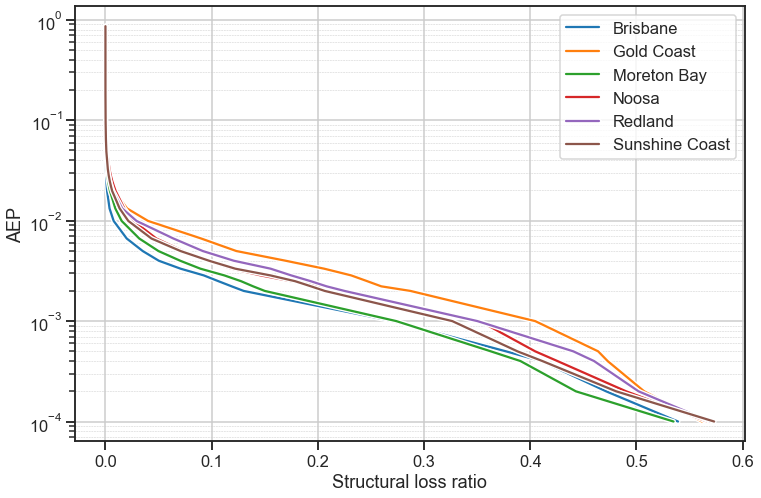

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Structural loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_EPcurve.png"), bbox_inches="tight")

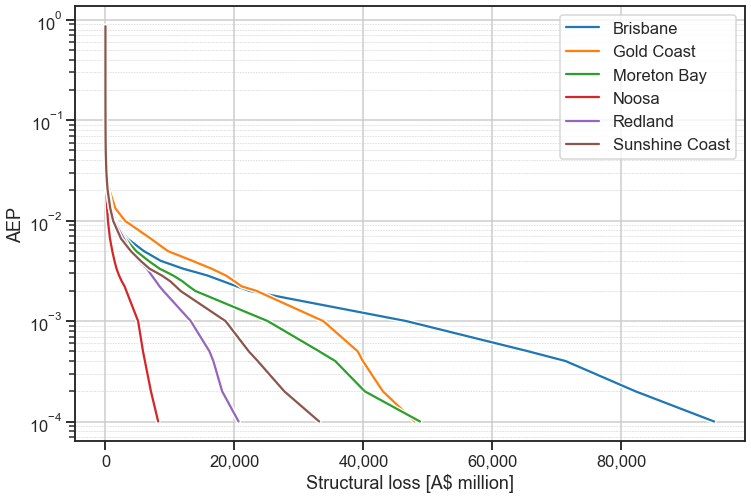

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Structural loss [A$ million]")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_EPcurve.png"), bbox_inches="tight")

This plot demonstrates that our AAL levels are comparable to the losses associated with more frequent events (i.e. higher AEPs). In all cases, we can show that the AAL is closest to either the 1:3, 1:4 or 1:5 AEP loss. This qualitatively matches our expectation that the AAL should be close to the median loss, which happens to be the 1:2 AEP loss level. Due to the method we take to estimate AEP losses, this should be acceptable.

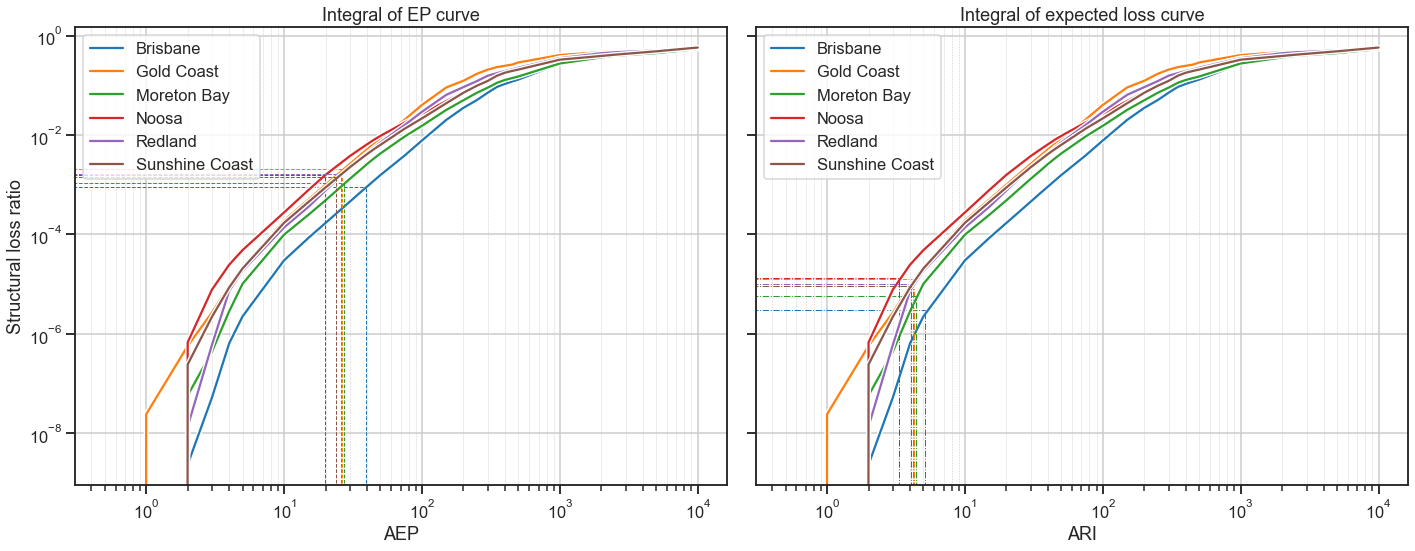

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax[0].loglog(ARIS, x, path_effects=[pe], label=LGAs[row.LGA_CODE])
    ax[1].loglog(ARIS, x, path_effects=[pe], label=LGAs[row.LGA_CODE])
    fint = interp1d(x, ARIS)
    xint = fint(row.AAL)
    nint = simpson(x*AEP, x=-AEP)
    xnint = fint(nint)
    ax[0].hlines(row.AAL, 0, xint, color=plt.gca().lines[-1].get_color(), linestyle='--', linewidth=1)
    ax[0].vlines(xint, 0, row.AAL, color=plt.gca().lines[-1].get_color(), linestyle='--', linewidth=1)

    ax[1].hlines(nint, 0, xnint, color=plt.gca().lines[-1].get_color(), linestyle='-.', linewidth=1)
    ax[1].vlines(xnint, 0, nint, color=plt.gca().lines[-1].get_color(), linestyle='-.', linewidth=1)

ax[0].grid(which='major', linestyle='-')
ax[0].grid(which='minor', linestyle='--', linewidth=0.5)
ax[0].legend()
ax[0].set_xlabel("AEP")
ax[0].set_ylabel("Structural loss ratio")
ax[1].set_title("Integral of expected loss curve")
ax[1].grid(which='major', linestyle='-')
ax[1].grid(which='minor', linestyle='--', linewidth=0.5)
ax[1].legend()
ax[1].set_xlabel("ARI")
ax[0].set_title("Integral of EP curve")
fig.tight_layout()
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_ELcurve_AALind.png"), bbox_inches="tight")

Using the integral of the exceedance probability curve gives AAL levels that are comparable to loss levels associated with 1:20 or 1:30 AEP events, which is substantially higher than intuitively expected. Using the integral of the expected losses, the AAL is of a similar order of magnitude to the losses associated with 1:3, 1:4 or 1:5 AEP events. We see some truncation in very low losses - this is due to the precision of the underlying vulnerability functions at low wind speeds.

Brisbane 0.5172898468740849 158.61124644171574
Gold Coast 1.023587802007914 166.5147102837078
Moreton Bay 0.5848513328647726 105.17034223291807
Noosa 0.188676173250795 23.361547134774522
Redland 0.4243757251949817 67.84874614422964
Sunshine Coast 0.5020485911742982 81.5347546998497


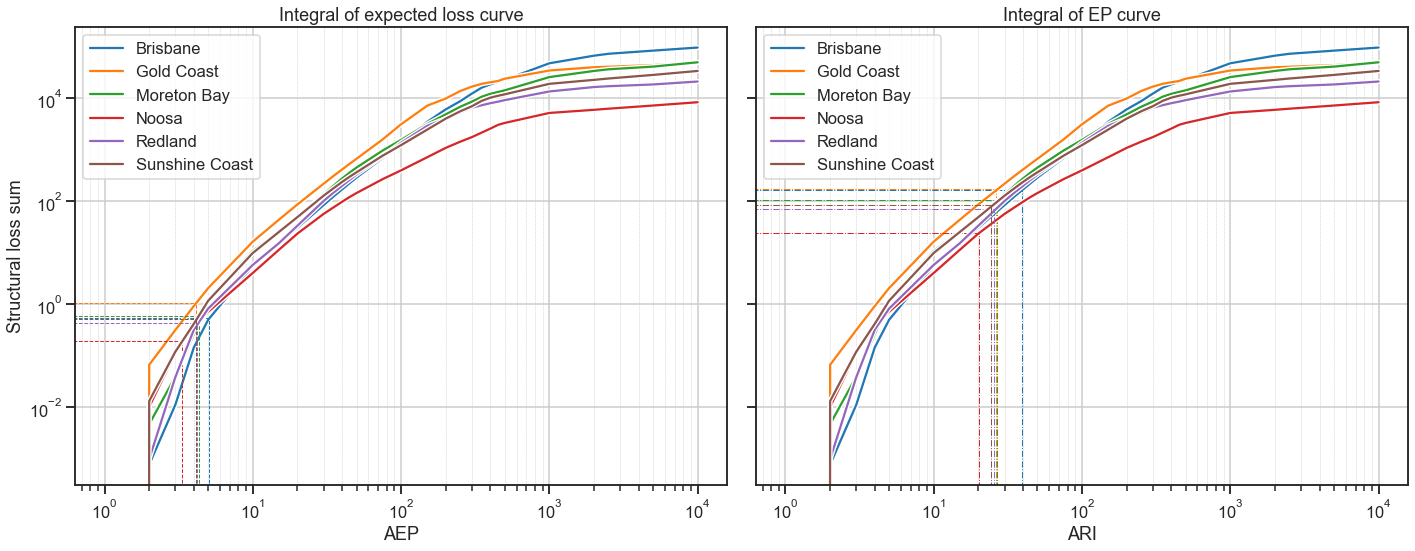

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax[0].loglog(ARIS, x, path_effects=[pe], label=LGAs[row.LGA_CODE])
    ax[1].loglog(ARIS, x, path_effects=[pe], label=LGAs[row.LGA_CODE])
    fint = interp1d(x, ARIS)
    xint = fint(row.AAL)
    nint = simpson(AEP, x=x)
    xnint = fint(nint)
    ax[0].hlines(row.AAL, 0, xint, color=plt.gca().lines[-1].get_color(), linestyle='--', linewidth=1)
    ax[0].vlines(xint, 0, row.AAL, color=plt.gca().lines[-1].get_color(), linestyle='--', linewidth=1)

    ax[1].hlines(nint, 0, xnint, color=plt.gca().lines[-1].get_color(), linestyle='-.', linewidth=1)
    ax[1].vlines(xnint, 0, nint, color=plt.gca().lines[-1].get_color(), linestyle='-.', linewidth=1)

ax[0].grid(which='major', linestyle='-')
ax[0].grid(which='minor', linestyle='--', linewidth=0.5)
ax[0].legend()
ax[0].set_xlabel("AEP")
ax[0].set_ylabel("Structural loss sum")
ax[0].set_title("Integral of expected loss curve")
ax[1].grid(which='major', linestyle='-')
ax[1].grid(which='minor', linestyle='--', linewidth=0.5)
ax[1].legend()
ax[1].set_xlabel("ARI")
ax[1].set_title("Integral of EP curve")
fig.tight_layout()
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_ELcurve_AALind.png"), bbox_inches="tight")

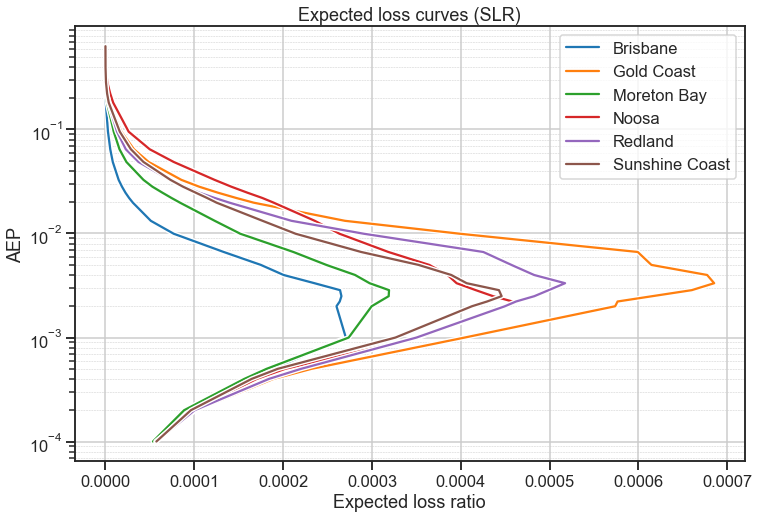

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x*AEP, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Expected loss curves (SLR)")
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Expected loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_ELcurve.png"), bbox_inches="tight")

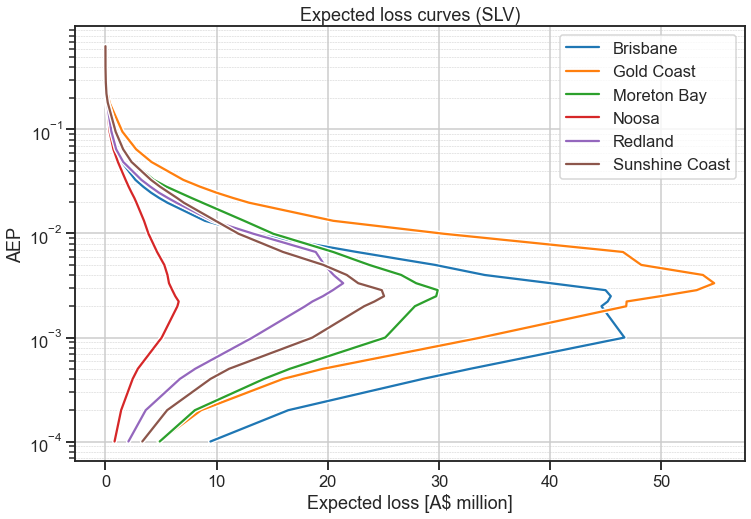

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogy(x*AEP, AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Expected loss curves (SLV)")
ax.legend()
ax.set_ylabel("AEP")
ax.set_xlabel("Expected loss [A$ million]")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_ELcurve.png"), bbox_inches="tight")

The greatest contribution to the AAL is demonstrated by plotting the expected loss against ARI (or AEP). For the most part, the expected loss values peak between exceedance probabilities of 1:200 and 1:500. The wind hazard profile is dominated by TC at these AEPs. In the case of a changing hazard profile due to changes in TC behaviour, this means we should continue to refine our understanding of the likelihood of TCs and how that may change into the future.

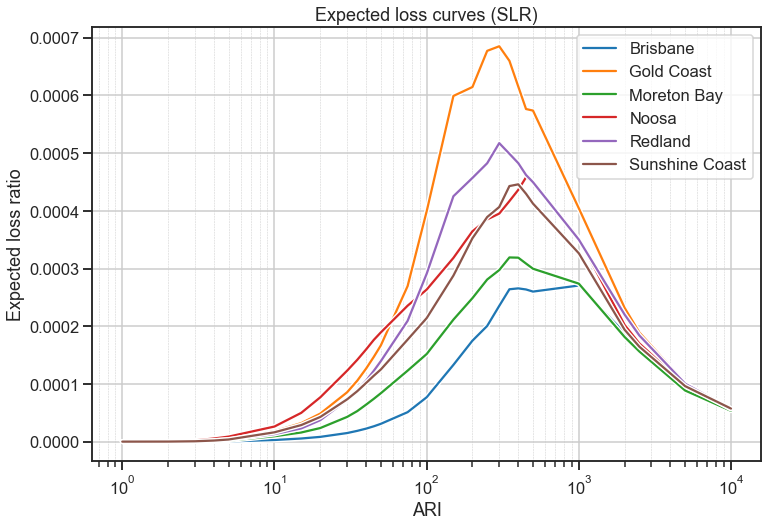

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogx(ARIS, x*AEP, path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Expected loss curves (SLR)")
ax.legend()
ax.set_xlabel("ARI")
ax.set_ylabel("Expected loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_ELcurveARI.png"), bbox_inches="tight")

To compare the relative dominant loss-causing event, we plot the cumulative expected loss level, normalised by the AAL. Thus all values are in the range [0, 1]. A curve further to the left indicates a greater portion of the loss accumulates at higher exceedance probabilities (shorter return periods). So for the plot below, the losses in Noosa accumulate as a result of more frequent events than other LGAs. Brisbane is the reverse - more extreme events are more dominant in the evaluation of average annual losses. The equivalent figure for structural loss values is qualitatively similar, with Noosa to the left and Brisbane well to the right. The remaining LGAs are more tightly clustered than in the SLV cumulative expected loss values.

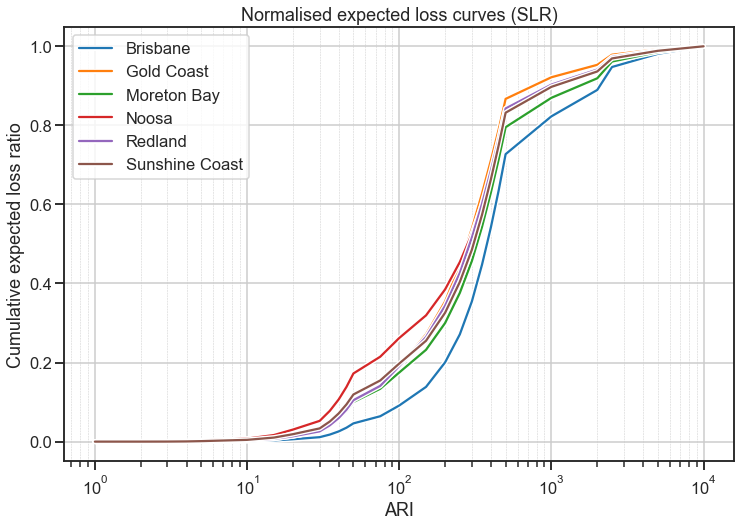

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in df.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogx(ARIS, np.cumsum(x*AEP)/np.sum(x*AEP), path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Normalised expected loss curves (SLR)")
ax.legend()
ax.set_xlabel("ARI")
ax.set_ylabel("Cumulative expected loss ratio")
plt.savefig(os.path.join(SOURCEDIR, "structural_mean_LGA_CELcurveARI.png"), bbox_inches="tight")

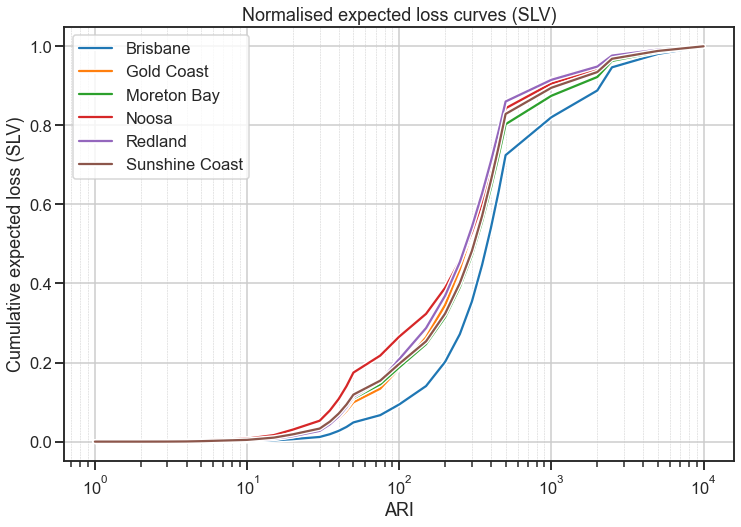

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for idx, row in lossdf.iterrows():
    x = row.drop(["LGA_CODE", "AAL"]).values
    ax.semilogx(ARIS, np.cumsum(x*AEP)/np.sum(x*AEP), path_effects=[pe], label=LGAs[row.LGA_CODE])
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.set_title("Normalised expected loss curves (SLV)")
ax.legend()
ax.set_xlabel("ARI")
ax.set_ylabel("Cumulative expected loss (SLV)")
plt.savefig(os.path.join(SOURCEDIR, "structural_loss_sum_LGA_CELcurveARI.png"), bbox_inches="tight")

In [14]:
LGAs[df.loc[0].LGA_CODE]

'Brisbane'

2.9824402330243158e-05 0.007721723181586266 0.2707254133919646
0.2838167131280285 7.6832429399685935 27.059009579488468


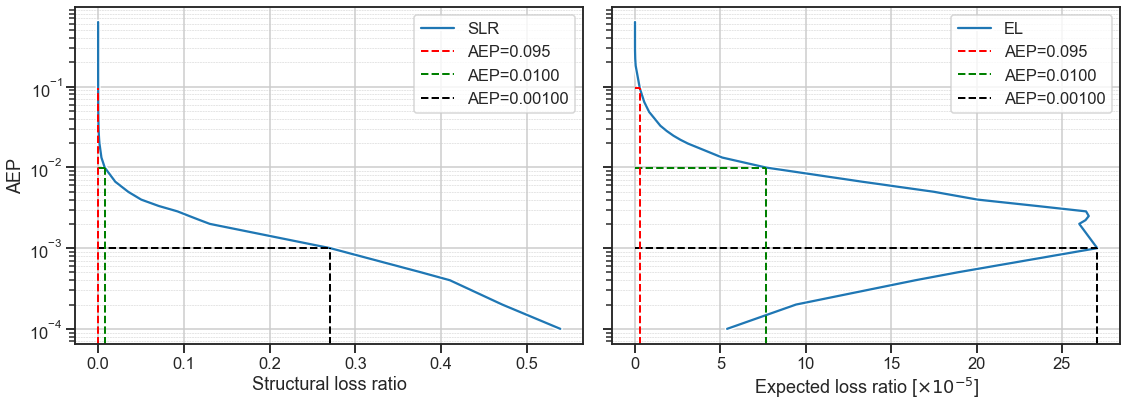

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
x = df.loc[0].drop(["LGA_CODE", "AAL"])
ax[0].semilogy(x, AEP, path_effects=[pe], label="SLR")
ax[0].grid(which='major', linestyle='-')
ax[0].grid(which='minor', linestyle='--', linewidth=0.5)
ax[0].legend()
ax[0].set_ylabel("AEP")
ax[0].set_xlabel("Structural loss ratio")

ax[1].semilogy(x*AEP*(10**5), AEP, path_effects=[pe], label="EL")
ax[1].grid(which='major', linestyle='-')
ax[1].grid(which='minor', linestyle='--', linewidth=0.5)
ax[1].legend()
ax[1].set_xlabel(r"Expected loss ratio [$\times 10^{-5}$]")
plt.tight_layout()

aep1 = 1.0 - np.exp(-1.0/np.array(10))
aep2 = 1.0 - np.exp(-1.0/np.array(100))
aep3 = 1.0 - np.exp(-1.0/np.array(1000))
slr1 = x[5]
slr2 = x[14]
slr3 = x[23]
el1 = slr1 * aep1 * 10**5
el2 = slr2 * aep2 * 10**5
el3 = slr3 * aep3 * 10**5

print(slr1, slr2, slr3)
print(el1, el2, el3)

ax[0].hlines(aep1, 0, slr1, linestyle='--', color='r', linewidth=2, label=f"AEP={aep1:.3f}")
ax[0].hlines(aep2, 0, slr2, linestyle='--', color='g', linewidth=2, label=f"AEP={aep2:.4f}")
ax[0].hlines(aep3, 0, slr3, linestyle='--', color='k', linewidth=2, label=f"AEP={aep3:.5f}")

ax[0].vlines(slr1, 0, aep1, linestyle='--', color='r', linewidth=2)
ax[0].vlines(slr2, 0, aep2, linestyle='--', color='g', linewidth=2)
ax[0].vlines(slr3, 0, aep3, linestyle='--', color='k', linewidth=2)

ax[1].hlines(aep1, 0, el1, linestyle='--', color='r', linewidth=2, label=f"AEP={aep1:.3f}")
ax[1].hlines(aep2, 0, el2, linestyle='--', color='g', linewidth=2, label=f"AEP={aep2:.4f}")
ax[1].hlines(aep3, 0, el3, linestyle='--', color='k', linewidth=2, label=f"AEP={aep3:.5f}")
ax[1].vlines(el1, 0, aep1, linestyle='--', color='r', linewidth=2)
ax[1].vlines(el2, 0, aep2, linestyle='--', color='g', linewidth=2)
ax[1].vlines(el3, 0, aep3, linestyle='--', color='k', linewidth=2)
ax[0].legend()
ax[1].legend()
plt.savefig(os.path.join(SOURCEDIR, "SLR_EL_example.png"), bbox_inches="tight")

